[StackOverflow data](https://drive.google.com/file/d/1w8z6HmFe4oCQSG6DjomSRUWvJ-gK0LTe/view?usp=sharing) 

In [1]:
PATH_TO_DATA = '../../data/stackoverflow'

In [2]:
classes = ['javascript', 'java', 'python', 'ruby',
           'php', 'c++', 'c#', 'go', 'scala', 'swift']

In [3]:
!ls $PATH_TO_DATA/*.tsv

../../data/stackoverflow/stackoverflow_raw_test_2500k.tsv
../../data/stackoverflow/stackoverflow_raw_train_7500k.tsv


In [4]:
!du -hc $PATH_TO_DATA/*.tsv

2.6G	../../data/stackoverflow/stackoverflow_raw_test_2500k.tsv
7.8G	../../data/stackoverflow/stackoverflow_raw_train_7500k.tsv
11G	total


Preprocessed

In [5]:
!ls $PATH_TO_DATA/*.vw

../../data/stackoverflow/stackoverflow_train.vw
../../data/stackoverflow/stackoverflow_valid.vw


In [6]:
!wc -l $PATH_TO_DATA/*.vw

 2194270 ../../data/stackoverflow/stackoverflow_train.vw
 1097133 ../../data/stackoverflow/stackoverflow_valid.vw
 3291403 total


In [7]:
!head -2 $PATH_TO_DATA/stackoverflow_train.vw

1 | i ve got some code in window scroll that checks if an element is visible then triggers another function however only the first section of code is firing both bits of code work in and of themselves if i swap their order whichever is on top fires correctly my code is as follows fn isonscreen function use strict var win window viewport top win scrolltop left win scrollleft bounds this offset viewport right viewport left + win width viewport bottom viewport top + win height bounds right bounds left + this outerwidth bounds bottom bounds top + this outerheight return viewport right lt bounds left viewport left gt bounds right viewport bottom lt bounds top viewport top gt bounds bottom window scroll function use strict var load_more_results ajax load_more_results isonscreen if load_more_results true loadmoreresults var load_more_staff ajax load_more_staff isonscreen if load_more_staff true loadmorestaff what am i doing wrong can you only fire one event from window scroll i assume not
4 |

In [8]:
# mac: brew install vowpal-wabbit
!vw --version

8.7.0


In [9]:
!vw --help

Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = 
num sources = 1
driver:
  --onethread           Disable parse thread
VW options:
  --ring_size arg (=256, ) size of example ring
  --strict_parse           throw on malformed examples
Update options:
  -l [ --learning_rate ] arg Set learning rate
  --power_t arg              t power value
  --decay_learning_rate arg  Set Decay factor for learning_rate between passes
  --initial_t arg            initial t value
  --feature_mask arg         Use existing regressor to determine which 
                             parameters may be updated.  If no 
                             initial_regressor given, also used for initial 
                             weights.
Weight options:
  -i [ --initial_regressor ] arg  Initial regressor(s)
  --initial_weight arg            Set all weights to an initial value of arg.
  --random_weights                make initial weights random
  --normal_weights  

In [15]:
%%time
!vw --oaa 10 -d $PATH_TO_DATA/stackoverflow_train.vw \
    -f $PATH_TO_DATA/model.vw

final_regressor = ../../data/stackoverflow/model.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = ../../data/stackoverflow/stackoverflow_train.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.000000 0.000000            1            1.0        1        1      161
0.500000 1.000000            2            2.0        4        1       68
0.750000 1.000000            4            4.0        7        1       88
0.875000 1.000000            8            8.0        7        2       95
0.875000 0.875000           16           16.0        7        7      209
0.843750 0.812500           32           32.0        7        5      174
0.812500 0.781250           64           64.0        3        3      204
0.703125 0.593750          128          128.0        1        5       29
0.628906 0.554688          256          256.0      

prediction for the validation set

In [17]:
%%time
!vw -i $PATH_TO_DATA/model.vw \
    -d $PATH_TO_DATA/stackoverflow_valid.vw \
    -p $PATH_TO_DATA/valid_pred.txt

predictions = ../../data/stackoverflow/valid_pred.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = ../../data/stackoverflow/stackoverflow_valid.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.000000 0.000000            1            1.0        7        7       85
0.000000 0.000000            2            2.0        1        1      362
0.000000 0.000000            4            4.0        5        5       56
0.250000 0.500000            8            8.0        2        2      415
0.125000 0.000000           16           16.0        3        3      568
0.156250 0.187500           32           32.0       10       10      343
0.187500 0.218750           64           64.0        7        7      305
0.164062 0.140625          128          128.0        6        2       97
0.152344 0.140625          256          256.0    

In [18]:
!head $PATH_TO_DATA/valid_pred.txt

7
1
6
5
7
1
6
2
3
3


In [19]:
!ls $PATH_TO_DATA/*.txt

../../data/stackoverflow/stackoverflow_valid_labels.txt
../../data/stackoverflow/valid_pred.txt


In [27]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

In [21]:
%%time
y_valid = np.loadtxt(PATH_TO_DATA + '/stackoverflow_valid_labels.txt')
valid_pred = np.loadtxt(PATH_TO_DATA + '/valid_pred.txt')

CPU times: user 7.1 s, sys: 84.9 ms, total: 7.19 s
Wall time: 7.35 s


In [22]:
accuracy_score(y_valid, valid_pred)

0.8722643471666608

In [24]:
np.bincount(y_valid.astype('int'))

array([     0, 222623, 218653, 128562,  31658, 175051,  88811, 191694,
         3779,  10761,  25541])

In [25]:
from matplotlib import pyplot as plt 
import itertools 
%config InlineBackend.figure_format = 'retina'

def plot_confusion_matrix(actual, predicted, classes,
                          normalize=False,
                          title='Confusion matrix', figsize=(7,7),
                          cmap=plt.cm.Blues, path_to_save_fig=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    
    cm = confusion_matrix(actual, predicted).T
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    
    if path_to_save_fig:
        plt.savefig(path_to_save_fig, dpi=300, bbox_inches='tight')

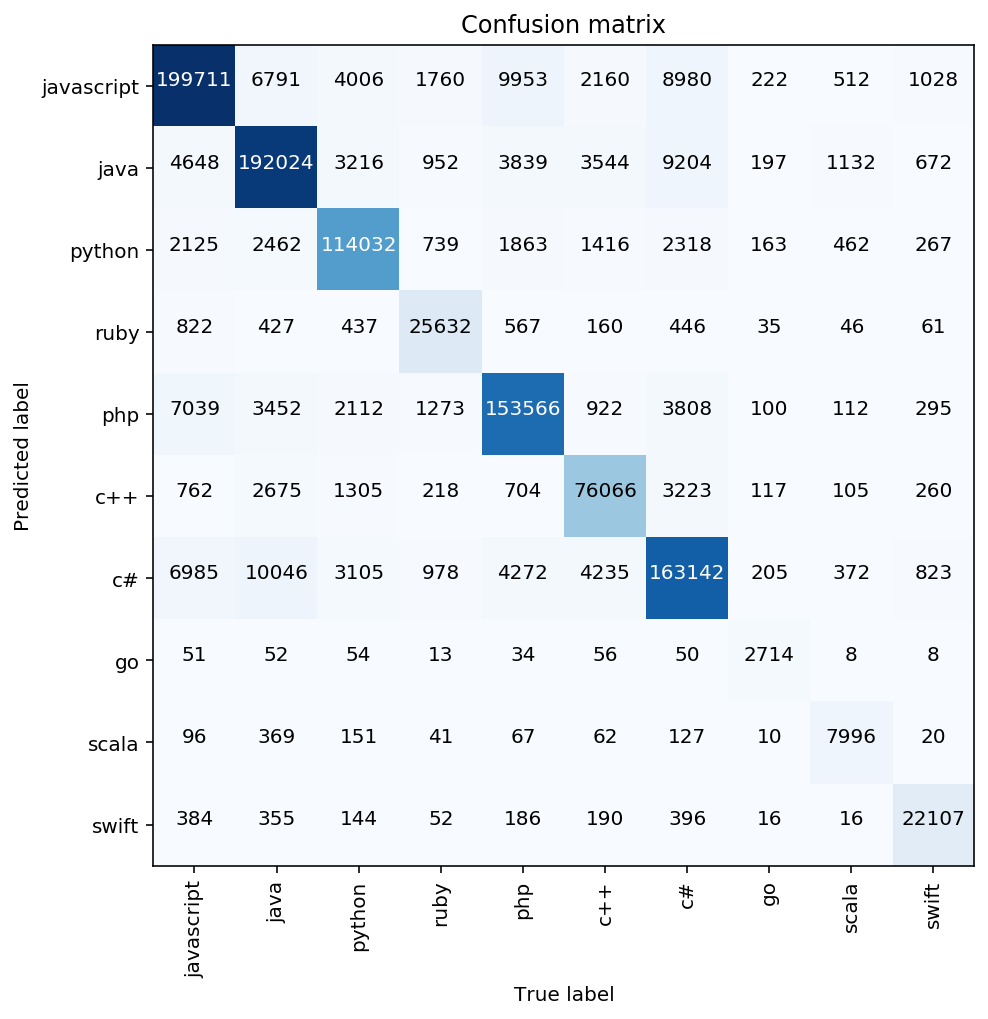

In [28]:
plot_confusion_matrix(actual=y_valid,
                     predicted=valid_pred,
                     classes=classes)

adding ngrams, increase hash space dim (#bits)

In [29]:
2 ** 26

67108864

In [32]:
%%time
!vw --oaa 10 -b 22 -d $PATH_TO_DATA/stackoverflow_train.vw \
    -f $PATH_TO_DATA/model2.vw --ngram 2 # --random_seed 17 --quiet -passes

Generating 2-grams for all namespaces.
final_regressor = ../../data/stackoverflow/model2.vw
Num weight bits = 22
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = ../../data/stackoverflow/stackoverflow_train.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.000000 0.000000            1            1.0        1        1      320
0.500000 1.000000            2            2.0        4        1      134
0.750000 1.000000            4            4.0        7        1      174
0.750000 0.750000            8            8.0        7        1      188
0.750000 0.750000           16           16.0        7        7      416
0.781250 0.812500           32           32.0        7        2      346
0.750000 0.718750           64           64.0        3        3      406
0.656250 0.562500          128          128.0        1        7       56
0.582031 0.

In [33]:
%%time
!vw -i $PATH_TO_DATA/model2.vw \
    -d $PATH_TO_DATA/stackoverflow_valid.vw \
    -p $PATH_TO_DATA/valid_pred2.txt

Generating 2-grams for all namespaces.
predictions = ../../data/stackoverflow/valid_pred2.txt
Num weight bits = 22
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = ../../data/stackoverflow/stackoverflow_valid.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.000000 0.000000            1            1.0        7        7      168
0.000000 0.000000            2            2.0        1        1      722
0.000000 0.000000            4            4.0        5        5      110
0.125000 0.250000            8            8.0        2        2      828
0.062500 0.000000           16           16.0        3        3     1134
0.093750 0.125000           32           32.0       10       10      684
0.093750 0.093750           64           64.0        7        7      608
0.109375 0.125000          128          128.0        6        3      192
0.105469 

In [34]:
%%time
valid_pred2 = np.loadtxt(PATH_TO_DATA + '/valid_pred2.txt')

CPU times: user 3.68 s, sys: 47.9 ms, total: 3.73 s
Wall time: 3.79 s


In [35]:
accuracy_score(y_valid, valid_pred2)

0.915043116923837

## Python wrapper

In [5]:
#!sh run_docker_jupyter.sh festline/mlcourse_ai

In [6]:
!vw --version

8.5.0


In [1]:
from vowpalwabbit import pyvw

In [8]:
vw_model = pyvw.vw(b=18, oaa=10, quiet=True)

In [9]:
!ls $PATH_TO_DATA/*.vw

../../data/stackoverflow/model.vw
../../data/stackoverflow/model2.vw
../../data/stackoverflow/stackoverflow_train.vw
../../data/stackoverflow/stackoverflow_valid.vw


In [10]:
!wc -l $PATH_TO_DATA/stack*.vw

   2194270 ../../data/stackoverflow/stackoverflow_train.vw
   1097133 ../../data/stackoverflow/stackoverflow_valid.vw
   3291403 total


In [11]:
from tqdm import tqdm_notebook

In [12]:
with open(PATH_TO_DATA + '/stackoverflow_train.vw') as f:
    # '1 | question text'
    for line in tqdm_notebook(f, total=2194270):
        vw_model.learn(line)

In [13]:
valid_predictions = []
with open(PATH_TO_DATA + '/stackoverflow_valid.vw') as f:
    # '1 | question text'
    for line in tqdm_notebook(f, total=1097133):
        curr_prediction = vw_model.predict(line)
        valid_predictions.append(curr_prediction)

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score

In [16]:
y_valid = np.loadtxt(PATH_TO_DATA + '/stackoverflow_valid_labels.txt')

In [ ]:
accuracy_score(y_valid, valid_predictions)